# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: bert (64)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

X = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_X.npy')
y = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_y.h5').is_vulnerable.values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.25, random_state=10)

print("class counts data set before undersampling:", Counter(Y_train))
# undersample class 0
X_train, Y_train = undersample( np.reshape(X_train, (-1, 64*768) ), Y_train)
X_train = np.reshape(X_train, (-1, 64, 768))

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

class counts data set before undersampling: Counter({0: 11742, 1: 231})
Y_train:
Counter({0: 231, 1: 231})
(462, 64, 768)
(462,)

Y_val:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)

Y_test:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)


## Undersampling

In [17]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
734/734 [==============================] - 98s 133ms/step - loss: 0.0588 - accuracy: 0.9907 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 2/8
734/734 [==============================] - 97s 132ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 9.5747e-04 - val_accuracy: 0.9990
Epoch 3/8
734/734 [==============================] - 97s 132ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 4/8
734/734 [==============================] - 97s 132ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 5/8
734/734 [==============================] - 97s 132ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 6/8
734/734 [==============================] - 97s 132ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0062 - val_accuracy: 0.9990
Epoch 7/8
734/734 [==============================] - 96s 131ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0046 - val_accur

## Evaluation

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3914
           1       0.96      1.00      0.98        77

    accuracy                           1.00      3991
   macro avg       0.98      1.00      0.99      3991
weighted avg       1.00      1.00      1.00      3991

Confusion matrix:
[[3911    3]
 [   0   77]]

Confusion matrix (Percentages):
[[9.7995e+01 7.5000e-02]
 [0.0000e+00 1.9290e+00]]

Metrics:
Sensitivity (TPR): 1.000000
Specifity (TNR):   0.999234

FPR: 0.000766
FNR: 0.000000

Balanced accuracy: 0.999617



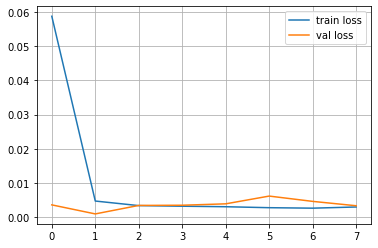

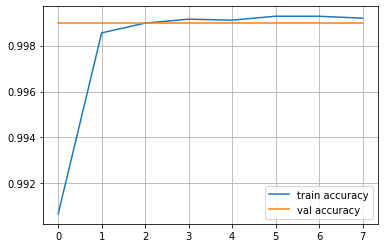

In [18]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [19]:
model.save('ResNet_bert64_undersample.h5')

## weighted

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.25, random_state=10)

classWeights = {
    0: ( 1 / Counter(Y_train)[0] ) * Y_train.shape[0] / 2.0 ,
    1: ( 1 / Counter(Y_train)[1] ) * Y_train.shape[0] / 2.0
}
print("weights:", classWeights)

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

weights: {0: 0.5098364844149208, 1: 25.915584415584416}
train:
Counter({0: 11742, 1: 231})
(11973, 64, 768)
(11973,)

val:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)

test:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)


In [6]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val),
                    class_weight=classWeights
                   )

Epoch 1/8
375/375 [==============================] - 53s 141ms/step - loss: 2.4862 - accuracy: 0.7439 - val_loss: 0.1607 - val_accuracy: 0.8842
Epoch 2/8
375/375 [==============================] - 52s 140ms/step - loss: 0.3939 - accuracy: 0.9365 - val_loss: 0.0292 - val_accuracy: 0.9915
Epoch 3/8
375/375 [==============================] - 52s 140ms/step - loss: 0.1639 - accuracy: 0.9774 - val_loss: 0.0152 - val_accuracy: 0.9970
Epoch 4/8
375/375 [==============================] - 52s 139ms/step - loss: 0.1086 - accuracy: 0.9853 - val_loss: 0.0646 - val_accuracy: 0.9657
Epoch 5/8
375/375 [==============================] - 51s 136ms/step - loss: 0.0424 - accuracy: 0.9929 - val_loss: 0.0413 - val_accuracy: 0.9937
Epoch 6/8
375/375 [==============================] - 51s 136ms/step - loss: 0.1208 - accuracy: 0.9810 - val_loss: 0.0900 - val_accuracy: 0.9769
Epoch 7/8
375/375 [==============================] - 51s 136ms/step - loss: 0.0721 - accuracy: 0.9857 - val_loss: 0.0053 - val_accuracy:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3914
           1       0.65      1.00      0.79        77

    accuracy                           0.99      3991
   macro avg       0.82      0.99      0.89      3991
weighted avg       0.99      0.99      0.99      3991

Confusion matrix:
[[3872   42]
 [   0   77]]

Confusion matrix (Percentages):
[[97.018  1.052]
 [ 0.     1.929]]

Metrics:
Sensitivity (TPR): 1.000000
Specifity (TNR):   0.989269

FPR: 0.010731
FNR: 0.000000

Balanced accuracy: 0.994635



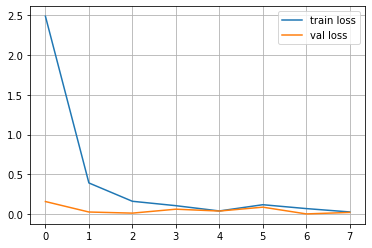

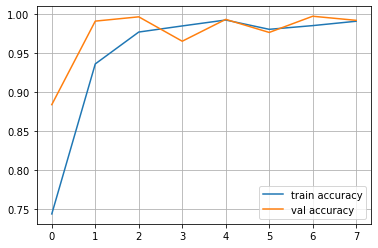

In [7]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [8]:
model.save('ResNet_bert64_weighted.h5')

## No imbalance migation

In [9]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
375/375 [==============================] - 52s 138ms/step - loss: 0.0848 - accuracy: 0.9940 - val_loss: 0.0068 - val_accuracy: 0.9997
Epoch 2/8
375/375 [==============================] - 51s 137ms/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9990
Epoch 3/8
375/375 [==============================] - 52s 138ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 4/8
375/375 [==============================] - 51s 135ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 7.7025e-04 - val_accuracy: 0.9997
Epoch 5/8
375/375 [==============================] - 52s 138ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 6/8
375/375 [==============================] - 51s 136ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 9.5280e-04 - val_accuracy: 0.9997
Epoch 7/8
375/375 [==============================] - 51s 137ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 7.1363e-04 - v

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3914
           1       0.96      1.00      0.98        77

    accuracy                           1.00      3991
   macro avg       0.98      1.00      0.99      3991
weighted avg       1.00      1.00      1.00      3991

Confusion matrix:
[[3911    3]
 [   0   77]]

Confusion matrix (Percentages):
[[9.7995e+01 7.5000e-02]
 [0.0000e+00 1.9290e+00]]

Metrics:
Sensitivity (TPR): 1.000000
Specifity (TNR):   0.999234

FPR: 0.000766
FNR: 0.000000

Balanced accuracy: 0.999617



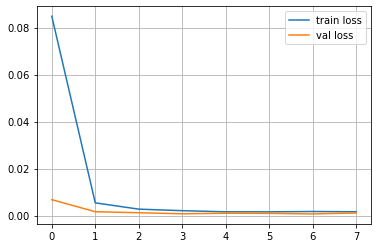

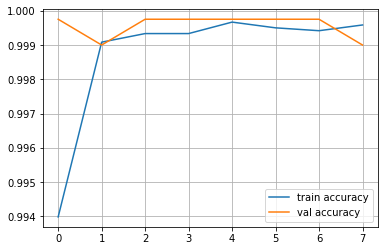

In [10]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [11]:
model.save('ResNet_bert64.h5')

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=5)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, stratify=Y_train, test_size=0.25, random_state=10)

del X
del y

# oversample class 1
X_train, Y_train = oversample_smote(np.reshape(X_train, (-1, 64*768)), Y_train )
X_train = np.reshape( X_train, (-1, 64, 768) )
print("class counts oversampled data set:", (X_train.shape[0], Y_train.shape[0]))

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

imbalanced_learn version  0.7.0
Counter output before SMOTE: Counter({0: 11742, 1: 231})
Counter output after SMOTE: Counter({0: 11742, 1: 11742})
class counts oversampled data set: (23484, 23484)
train:
Counter({0: 11742, 1: 11742})
(23484, 64, 768)
(23484,)

val:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)

test:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)


In [13]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
734/734 [==============================] - 97s 132ms/step - loss: 0.4488 - accuracy: 0.9584 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 2/8
734/734 [==============================] - 95s 130ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 3/8
734/734 [==============================] - 95s 130ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0069 - val_accuracy: 0.9990
Epoch 4/8
734/734 [==============================] - 96s 131ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 7.9432e-04 - val_accuracy: 0.9997
Epoch 5/8
734/734 [==============================] - 96s 130ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 6/8
734/734 [==============================] - 95s 130ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 7/8
734/734 [==============================] - 96s 131ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0049 - val_accur

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3914
           1       0.96      1.00      0.98        77

    accuracy                           1.00      3991
   macro avg       0.98      1.00      0.99      3991
weighted avg       1.00      1.00      1.00      3991

Confusion matrix:
[[3911    3]
 [   0   77]]

Confusion matrix (Percentages):
[[9.7995e+01 7.5000e-02]
 [0.0000e+00 1.9290e+00]]

Metrics:
Sensitivity (TPR): 1.000000
Specifity (TNR):   0.999234

FPR: 0.000766
FNR: 0.000000

Balanced accuracy: 0.999617



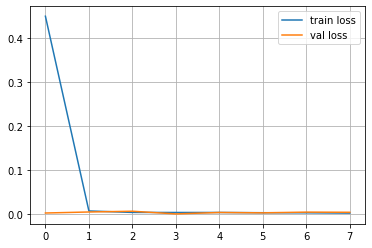

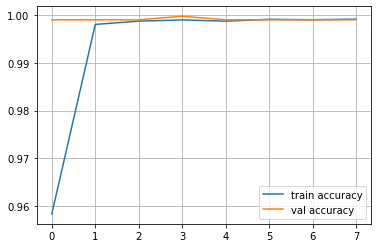

In [14]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [15]:
model.save('ResNet_bert64_SMOTE.h5')